### To Predict the Price of a Used Car Depending on its Specifications

A list of used-car sales is contained in the dataset. The descriptions of each column in the dataset are as follows.

Brand - The make of the car

Price - The price in USD

Body - The car's body style

EngineV - The engine volume / displacement in Liters

Mileage - The car's mileage in thousands. A "0" mileage means the car was driven for less than a thousand miles

EngineType - The type of the engine based on the fuel used.

Registration - A yes/no value indicating whether the car had a valid registration at the time of the sale

Year - The vehicles model year

Model - The name of the car's model (RAV4, Camry, Jetta, ...)

#### Load in Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

#### Import Data

Let's add the data and create a copy. From this point forward, we'll use the copy.

In [2]:
raw_data = pd.read_csv('C:/Users/darli/Downloads/ProjectsPortfolio/Car-Sales-Data.csv')
carsales = raw_data.copy()

#### Data Wrangling

Let's a take a look at the first 5 rows of the dataset.

In [3]:
carsales.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Now, let's describe the dataset statistically.

In [4]:
carsales.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


The count row in the preceding table immediately catches my attention. The gap in the numbers indicates that we have NULL values in our dataset.

#### Remove the Missing Values

In [5]:
carsales1 = carsales.dropna()

Let's verify that all the null values have been removed.

In [6]:
carsales1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [7]:
replace = {"EngineV" : "Engine_Volume", "Engine Type" : "Engine_Type"}
carsales2 = carsales1.rename(columns=replace)
carsales2

,Brand,Price,Body,Mileage,Engine_Volume,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### Recode String Data

In [8]:
def Brand(series):
    if series == 'BMW':
        return 0
    if series == 'Mercedes-Benz':
        return 1
    if series == 'Audi':
        return 2
    if series == 'Toyota':
        return 3
    if series == 'Renault':
        return 4
    if series == 'Volkswagen':
        return 5
    if series =='Mitsubishi':
        return 6
    
carsales2['BrandR']= carsales2['Brand'].apply(Brand)

In [9]:
carsales2.head()

,Brand,Price,Body,Mileage,Engine_Volume,Engine_Type,Registration,Year,Model,BrandR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,1
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,1
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,2
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,3


As I was looking through this dataset, I saw that the Engine Volume column's highest value is 99.99. A short search on Google revealed that no car in existence had an engine this large.

Because the highest engine volume is 99.99 according to the statistical description, let's subset the dataset with Engine_Volume smaller than or equal to 10L.

In [10]:
carsales2[carsales2.Engine_Volume < 10]

,Brand,Price,Body,Mileage,Engine_Volume,Engine_Type,Registration,Year,Model,BrandR
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,1
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,1
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,2
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,3
...,...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,3
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,1
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,0
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,0


#### Detect and Remove outliers

C:\Users\darli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

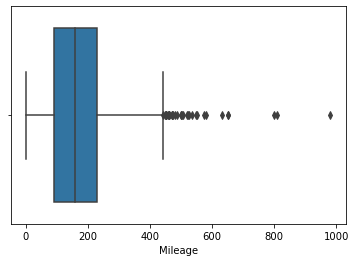

In [11]:
sns.boxplot(carsales2['Mileage'])

C:\Users\darli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine_Volume'>

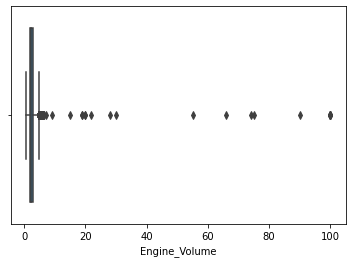

In [12]:
sns.boxplot(carsales2['Engine_Volume'])

C:\Users\darli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

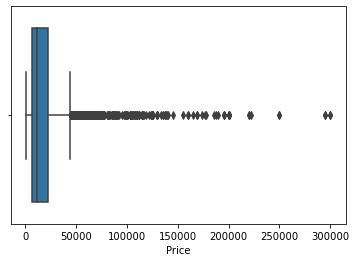

In [13]:
sns.boxplot(carsales2['Price'])

C:\Users\darli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

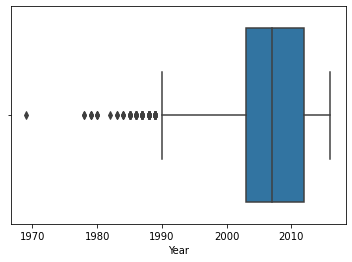

In [14]:
sns.boxplot(carsales2['Year'])

C:\Users\darli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BrandR'>

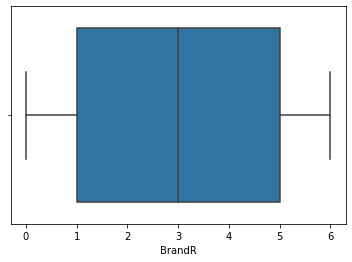

In [15]:
sns.boxplot(carsales2['BrandR'])

In [16]:
carsales3 = carsales2[['Price','Mileage','Engine_Volume','Year']]
q3, q1 = carsales3.quantile(0.75), carsales3.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((carsales3 < minm) | (carsales3 > (maxm))).sum())

Price            355
Mileage           36
Engine_Volume    173
Year             101
dtype: int64


There are 355 outliers in Price, 36 in Mileage, 173 in Engine_Volume, 101 in Year, and 106 in EngineTypeR .Now let's remove the outliers.

In [17]:
No_outliers = carsales2[~((carsales2 < minm) | (carsales2 > maxm)).any(axis=1)]

C:\Users\darli\AppData\Local\Temp/ipykernel_21448/3192353962.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  No_outliers = carsales2[~((carsales2 < minm) | (carsales2 > maxm)).any(axis=1)]


In [18]:
carsales4 = No_outliers[['Price','Mileage','Engine_Volume','Year']]
print(((carsales4 < minm) | (carsales4 > (maxm))).sum())

Price            0
Mileage          0
Engine_Volume    0
Year             0
dtype: int64


In [19]:
No_outliers1 = No_outliers.drop(['Brand','Body','Engine_Type','Registration','Model'], axis=1)

#### Pre-Processed Data

In [20]:
carsales5 = No_outliers1.copy()

In [21]:
carsales5.head()

,Price,Mileage,Engine_Volume,Year,BrandR
0,4200.0,277,2.0,1991,0
1,7900.0,427,2.9,1999,1
3,23000.0,240,4.2,2007,2
4,18300.0,120,2.0,2011,3
6,6100.0,438,2.0,1997,0


### Assumptions

#### Multicollinearity

In [22]:
corr = carsales5[['Mileage','Engine_Volume','Year', 'BrandR']].corr()
corr

,Mileage,Engine_Volume,Year,BrandR
Mileage,1.000000,0.151534,-0.691273,-0.220715
Engine_Volume,0.151534,1.000000,-0.154743,-0.374353
Year,-0.691273,-0.154743,1.000000,0.230399
BrandR,-0.220715,-0.374353,0.230399,1.000000


There seems to be negative correlation between Year and Mileage, let's calculate the Variance Inflation Factors (VIF)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = carsales5[['Mileage', 'Engine_Volume', 'Year','BrandR']]
vif_df = pd.DataFrame(variables.columns.values, columns = ['Feature'])
vif_df['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_df

,Feature,VIF
0,Mileage,4.760299
1,Engine_Volume,12.322827
2,Year,22.461934
3,BrandR,3.900400


We can see that the 'Engine_Volume'and 'Year' have high VIF value.

Let's drop 'Year' because it has a higher VIF to fix the multicollinearity.

In [24]:
carsales6 = carsales5.drop(['Year'], axis=1)

In [25]:
carsales6.head()

,Price,Mileage,Engine_Volume,BrandR
0,4200.0,277,2.0,0
1,7900.0,427,2.9,1
3,23000.0,240,4.2,2
4,18300.0,120,2.0,3
6,6100.0,438,2.0,0


#### Linearity

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

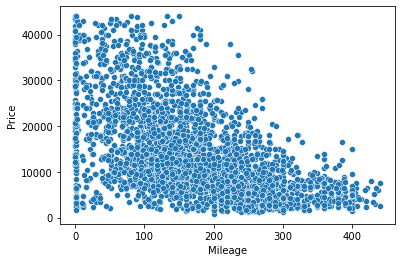

In [26]:
sns.scatterplot(x = carsales6.Mileage, y = carsales6.Price)

<AxesSubplot:xlabel='Engine_Volume', ylabel='Price'>

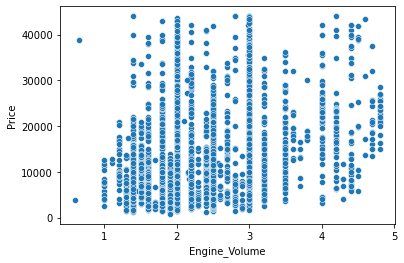

In [27]:
sns.scatterplot(x = carsales6.Engine_Volume, y = carsales6.Price)

<AxesSubplot:xlabel='BrandR', ylabel='Price'>

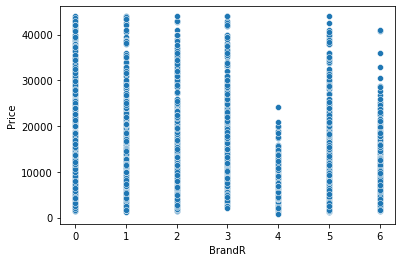

In [28]:
sns.scatterplot(x = carsales6.BrandR, y = carsales.Price)

#### Normal Distribution

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

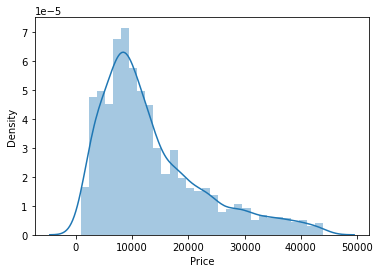

In [29]:
sns.distplot(carsales6.Price)

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

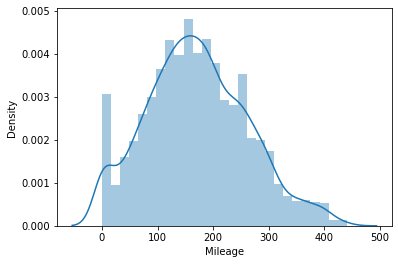

In [30]:
sns.distplot(carsales6.Mileage)

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BrandR', ylabel='Density'>

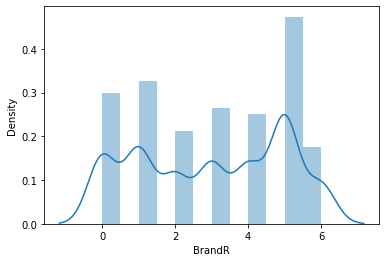

In [31]:
sns.distplot(carsales6.BrandR)

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine_Volume', ylabel='Density'>

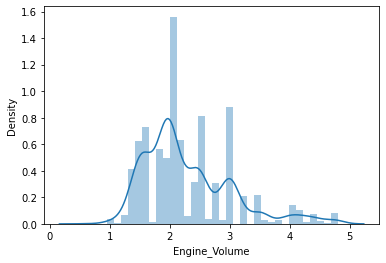

In [32]:
sns.distplot(carsales6.Engine_Volume)

### Transform Price, Engine_Volume, and BrandR

In [33]:
carsales6['sqrtPrice'] = np.sqrt(carsales6.Price)
carsales6.drop('Price', axis = 1, inplace = True)

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrtPrice', ylabel='Density'>

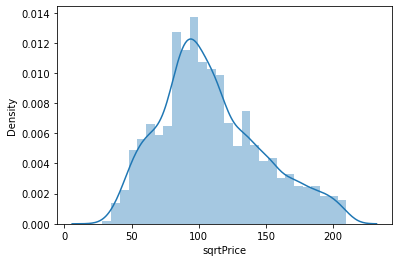

In [34]:
sns.distplot(carsales6.sqrtPrice)

In [35]:
carsales6['logEngine_Volume'] = np.log(carsales6.Engine_Volume)
carsales6.drop('Engine_Volume', axis = 1, inplace = True)

C:\Users\darli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logEngine_Volume', ylabel='Density'>

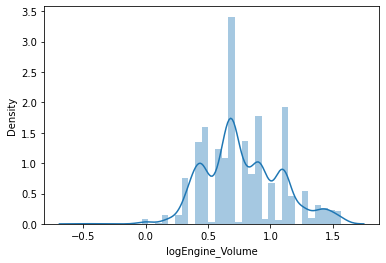

In [36]:
sns.distplot(carsales6.logEngine_Volume)

#### Create Training and Test Samples

 define the predictor variables and the response variable

In [37]:
X = carsales6[['BrandR','Mileage','logEngine_Volume']]
y = carsales6['sqrtPrice']

In [38]:
#split the dataset into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=76) 

creating function to get model statistics

In [39]:
import numpy as np
import statsmodels.api as sm

In [40]:
def get_stats():
    x = X
    results = sm.OLS(y, x).fit()
    print(results.summary())

In [41]:
get_stats()

                                 OLS Regression Results                                
Dep. Variable:              sqrtPrice   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              8563.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):                        0.00
Time:                        14:59:31   Log-Likelihood:                         -17406.
No. Observations:                3415   AIC:                                  3.482e+04
Df Residuals:                    3412   BIC:                                  3.484e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### Creating a Linear Model and Prediction

In [42]:
from sklearn import linear_model
x = X
linear_model = linear_model.LinearRegression()
linear_model.fit(x, y)
x_test = X
y_pred = linear_model.predict(x_test)

In [43]:
print(y_pred)

[ 83.20810935  59.17077556 125.03014559 ... 130.0774421  184.37698747
 112.7757553 ]


In [48]:
avg_y_pred = carsales2['Price'].mean()

In [45]:
print(avg_y_pred)

19552.308064596276


### Visualization

<Figure size 1080x1080 with 0 Axes>

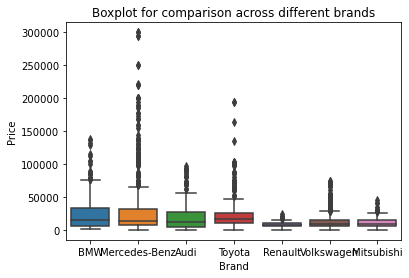

<Figure size 1080x1080 with 0 Axes>

In [46]:
sns.boxplot(x ='Brand', y = 'Price', data = carsales2)
plt.title('Boxplot for comparison across different brands') 
plt.figure(tight_layout = True, figsize = (15.0,15.0))